# Data Scientist – Demonstration Notebook

This notebook demonstrates advanced analytics, machine learning, NLP, federated learning, and data visualization, reflecting the responsibilities and requirements of a Data Scientist

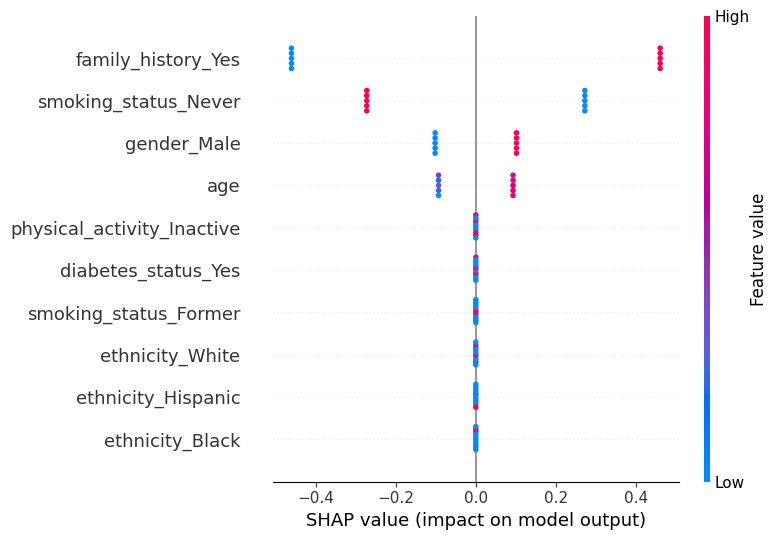

,feature,mean_abs_shap
0,family_history_Yes,0.461037
1,smoking_status_Never,0.272727
2,gender_Male,0.101693
3,age,0.093131
4,ethnicity_Black,0.000000
5,ethnicity_Hispanic,0.000000
6,ethnicity_White,0.000000
7,smoking_status_Former,0.000000
8,diabetes_status_Yes,0.000000
9,physical_activity_Inactive,0.000000


In [1]:
# Model Explainability Example (SHAP)
import shap
import xgboost as xgb
import pandas as pd

# Load and preprocess the demo data
df = pd.read_csv('../data/demo_patients.csv')
categorical_cols = ['gender', 'ethnicity', 'smoking_status', 'diabetes_status', 'physical_activity', 'family_history']
for col in categorical_cols:
    df[col] = df[col].astype('category')

X = pd.get_dummies(df.drop(columns=['cardio_risk', 'patient_id']), drop_first=True)
X = X.astype(float)  # Ensure all features are float
y = df['cardio_risk']

# Train XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X, y)

# SHAP explainability
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)
importances = pd.DataFrame({'feature': X.columns, 'mean_abs_shap': shap_values.abs.mean(0).values})
importances.sort_values('mean_abs_shap', ascending=False).reset_index(drop=True)

In [2]:
# Operational Oversight: SQL Query Example
import sqlite3
import pandas as pd

# Load demo data
df = pd.read_csv('../data/demo_patients.csv')

# Create in-memory SQLite database and load data
conn = sqlite3.connect(':memory:')
df.to_sql('patients', conn, index=False, if_exists='replace')

# Query the database with pandas
result = pd.read_sql('SELECT gender, COUNT(*) as count FROM patients GROUP BY gender', conn)
result

,gender,count
0,Female,5
1,Male,5


In [3]:
# Cross-functional Collaboration: Federated Learning Example (Flower)
# Note: Real federated learning requires a distributed setup with multiple clients and servers.
# This cell demonstrates the API, but does not run a federated workflow on the demo data.
# pip install flwr
import flwr as fl

def get_parameters(model):
    return [val.cpu().numpy() for _, val in model.state_dict().items()]

# Example Flower client/server setup would go here

In [4]:
# NLP Example: Text Classification with Transformers
from transformers import pipeline
classifier = pipeline('sentiment-analysis')
result = classifier('Sanofi is transforming healthcare with AI!')
result

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


[{'label': 'POSITIVE', 'score': 0.9980722665786743}]

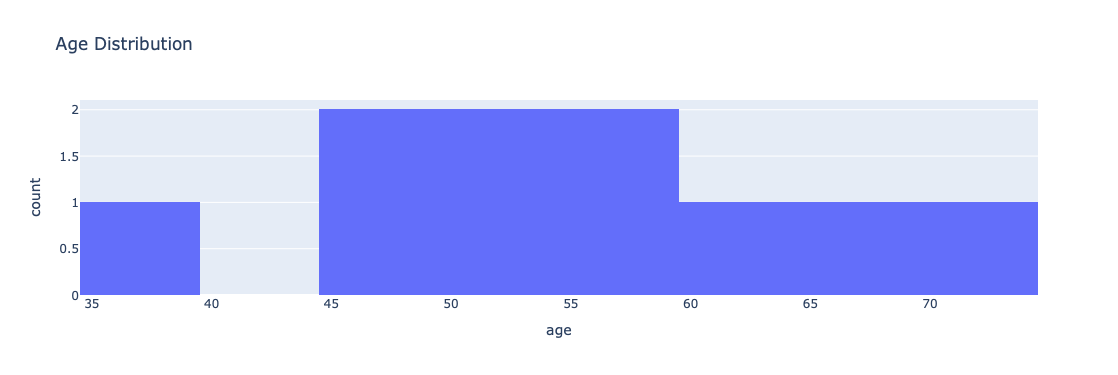

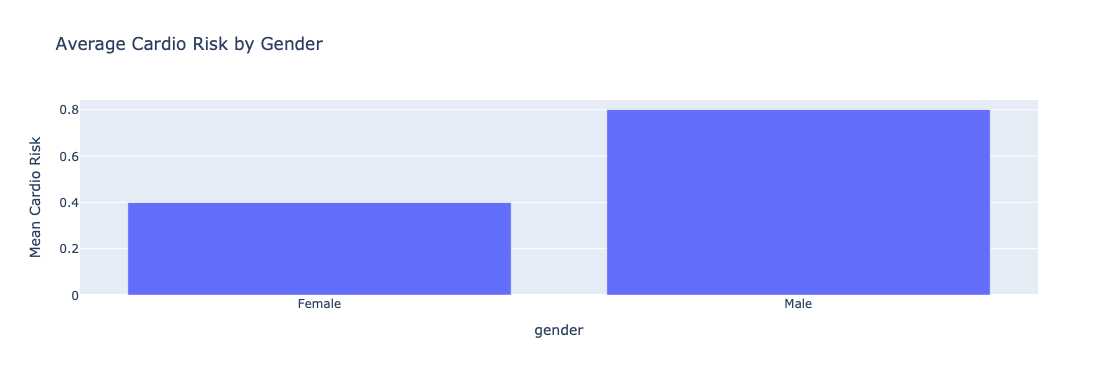

In [5]:
# Data Visualization: Plotly Example
import plotly.express as px
import pandas as pd

df = pd.read_csv('../data/demo_patients.csv')
# Age distribution histogram
fig1 = px.histogram(df, x='age', nbins=10, title='Age Distribution')
fig1.show()
# Cardio risk by gender bar plot
fig2 = px.bar(df.groupby('gender')['cardio_risk'].mean().reset_index(), x='gender', y='cardio_risk',
              title='Average Cardio Risk by Gender', labels={'cardio_risk': 'Mean Cardio Risk'})
fig2.show()

In [6]:
# Load and preview the demo dataset
import pandas as pd
df = pd.read_csv('../data/demo_patients.csv')
print(df.head())

   patient_id  age  gender ethnicity smoking_status diabetes_status  \
0           1   55    Male     Asian         Former              No   
1           2   62  Female     White          Never             Yes   
2           3   47    Male     Black        Current              No   
3           4   70  Female  Hispanic          Never             Yes   
4           5   38    Male     White          Never              No   

  physical_activity family_history  cardio_risk  
0            Active            Yes            1  
1          Inactive             No            0  
2            Active            Yes            1  
3          Inactive            Yes            1  
4            Active             No            0  
